In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
df = pd.read_csv('/content/dataset.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native.country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [21]:
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [22]:
df.shape

(32561, 9)

In [23]:
df.replace('?', pd.NA, inplace=True)# Replace '?' with NaN and drop missing values
df.dropna(inplace=True)

In [24]:
# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # Convert categorical to numerical


In [25]:
# Split dataset
X = df.drop(columns=['income'])
y = df['income']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
# predictions
y_pred = clf.predict(X_test)

In [29]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8148516492623902

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      4533
           1       0.70      0.44      0.54      1500

    accuracy                           0.81      6033
   macro avg       0.77      0.69      0.71      6033
weighted avg       0.80      0.81      0.80      6033



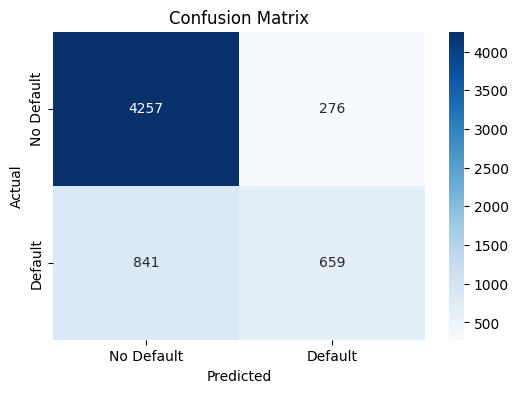

In [33]:
#Confiusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()